## Tie Strength

The task of this section is to study the _resilience_ of the network by analysing the impact of strong and weak ties on the connectivity of the network itself.

In more detail, the edges have been sorted from the strongest to the weakest. Then the 50000 first strongest ties have been removed. The same procedure has been repeated for the 50000 weakest and the results have been compared in order to study the resilience of the network in terms of connected components remaining.

The strength measure used for the edges is the overlap coefficient:

$ Overlapping coefficient i,j = 𝑁 𝑖 ∩ 𝑁(𝑗) /𝑁 𝑖 ∪ 𝑁(𝑗) $

For each edge:

𝑁 𝑖 ∩ 𝑁(𝑗) = number of neighbor nodes to i and j
𝑁 𝑖 ∪ 𝑁(𝑗) = number of neighbor nodes to i or j

Notice that when the strength of the tie increases, the overlapping coefficient increases as well.

Impact of the strong and weak ties rimotion on the network

On the x axis there are the number of removed edges, while on the y axis the number of connected components that the network is losing.
It emerges that removing from the weak to the strong ties, the network breaks apart faster

È possibile notare come procedendo in ordine crescente, cioè da weak a strong ties, la
rete si disgrega più velocemente: dopo soli 10000 archi eliminati, la rete risulta
scomposta in più di 400 componenti.
Si confronti la situazione risultante dopo l’eliminazione dello stesso numero di archi,
ma procedendo in ordine inverso, cioè da strong a weak ties: la rete non risulta essersi
distrutta, ma continua ad esistere un’unica componente.

In [4]:
import sys
import codecs
import copy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
n=open("network.csv", 'rb')
net = nx.read_edgelist("network.csv",create_using=nx.Graph())
n.close()

In [6]:
%%time
def components_stats(overlapping_coefficents, net):
    print ('computing number of components...')
    number_of_components = []
    for n1, n2, _ in overlapping_coefficents:
        number_of_components.append(nx.number_connected_components(net))
        net.remove_edge(n1, n2)
    return number_of_components

Wall time: 0 ns


In [7]:
%%time
def tie_strenght(file_input):
    # reads from file and building the network
    net = nx.Graph()
    print ('reading network...')
    with codecs.open(file_input, 'r', 'utf-8') as f:
        for line in f:
            line = line.strip().split(' ')
            net.add_edge(line[0], line[1])

Wall time: 0 ns


In [8]:
%%time
print ('computing overlapping coefficents...')
overlapping_coefficents = []
for n1, n2 in net.edges():
    overlapping_coefficents.append((n1, n2, len(list(nx.common_neighbors(net, n1, n2)))))


computing overlapping coefficents...
Wall time: 1min 5s


In [9]:
%%time
overlapping_coefficents = sorted(overlapping_coefficents, key=lambda tup: tup[2])

print ('saving a copy of the network..')
net_copy = net.copy()

saving a copy of the network..
Wall time: 937 ms


In [10]:
%%time
print ('removing nodes in increasing order by common_neighbors')
number_of_components_increasing = components_stats(overlapping_coefficents[:50000], net)

removing nodes in increasing order by common_neighbors
computing number of components...
Wall time: 41min 22s


In [12]:
%%time
print ('removing nodes in decreasing order by common_neighbors')
number_of_components_decreasing = components_stats(reversed(overlapping_coefficents[:50000]), net_copy)


removing nodes in decreasing order by common_neighbors
computing number of components...
Wall time: 30min 58s


## Plotting results

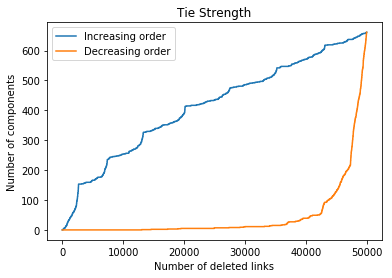

In [19]:
plt.ylabel('Number of components')
plt.xlabel('Number of deleted links')
plt.title('Tie Strength')
plt.plot(number_of_components_increasing, label="Increasing order")
plt.plot(number_of_components_decreasing, label="Decreasing order")
plt.legend()
plt.savefig('tie_strength.png', format='png')
plt.show()